# Lecture Notes: Machine Learning 3/31/24 Sunday

Titanic dataset: cbased on provided features in the titanic dataset, prepare the data and build a model to predict whether a passenger survived (Y/N)

In [36]:
import numpy as np 
import pandas as pd
import matplotlib as plt 
import seaborn as sns 


In [4]:
df = pd.read_csv('titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary 
Survived: 0=No; 1=Yes 

pclass: 0,1,2

sex

age

sibsp: #of siblings/spouses aboard the Titanic 

parch: # of parents/children aboard the Titanic 

ticket: ticket number

fare: Passenger fare

cabin: cabin number 

embarked: port of embarkation. c=cherbourg, Q=queenstown, S=southampton 

In [6]:
#Description of data 
print(df.shape)
df.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Grab first names 
df['Name'].str.split(',').str[0]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

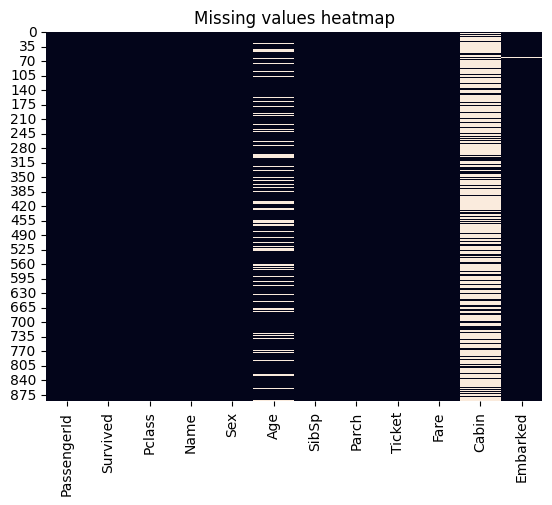

In [39]:
print(df.isna().sum())

sns.heatmap(df.isna(),cbar=False).set_title("Missing values heatmap")

In [33]:
df.loc[df['Fare']==0,'Pclass'].mean()

1.9333333333333333